In [35]:
# Import libraries

# First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

# Pandas for data handling
import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

# pretty tables
from IPython.display import display

# NumPy for numerical computing
import numpy # https://numpy.org/

# MatPlotLib + Seaborn for visualization
import matplotlib.pyplot as pl  # https://matplotlib.org/
import seaborn as sns   # https://seaborn.pydata.org/

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score

# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier





# <font color='red'>Part 1</font>

* **Load Data**

In [36]:
print('Loading data from file ...')  # Now let's load the data
dataset = pandas.read_csv('BDOShoham.csv') # default is header=infer, change if column names are not in first row
print('done \n')

print('Removing rows with missing data ...')  # Make things simple
dataset = dataset.dropna()  # default is to drop any row that contains at least one missing value
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



* **Sample rows from the dataset (top and bottom five)**

In [37]:
print('Sample rows from the dataset (top and bottom five):\n')  # Spot checks
display(dataset.head(5))
print('\n')
display(dataset.tail(5))


Sample rows from the dataset (top and bottom five):



,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
0,1,6.3,0.025,0.001,0.00002,1000,1.8,0.07,0.0,0.051
1,1,4.0,0.040,0.001,0.00002,1000,1.8,0.07,0.0,0.051
2,1,6.3,0.040,0.001,0.00002,1000,1.8,0.07,0.0,0.051
3,1,4.0,0.063,0.001,0.00002,1000,1.8,0.07,0.0,0.051
4,1,6.3,0.063,0.001,0.00002,1000,1.8,0.07,0.0,0.051


,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
5670,5,2.70096,15.8561,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5671,5,1.58784,15.8394,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5672,5,1.05338,16.0692,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5673,5,1.05397,25.7439,0.001,0.00002,1000,1.8,0.07,-80.0,0.025
5674,5,1.66789,26.1616,0.001,0.00002,1000,1.8,0.07,-80.0,0.025


* **Numerical Summary Table**

In [38]:
print('Summary of the dataset - Univariate statistics\n')   

display(dataset.describe(include='all'))


Summary of the dataset - Univariate statistics



,FlowPattern,Vsl,Vsg,VisL,VisG,DenL,DenG,ST,Ang,ID
count,5675.000000,5675.000000,5675.000000,5.675000e+03,5.675000e+03,5675.0,5.675000e+03,5.675000e+03,5675.000000,5675.000000
mean,4.059912,0.899747,6.222612,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,2.727401,0.038657
std,1.379238,1.425159,8.699644,4.055273e-17,2.361736e-18,0.0,4.108187e-14,5.690394e-15,46.202822,0.012985
min,1.000000,0.001100,0.003720,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-90.000000,0.025000
25%,3.000000,0.016000,0.162055,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,-10.000000,0.025000
50%,5.000000,0.250000,1.600000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,0.500000,0.051000
75%,5.000000,1.500000,10.000000,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,20.000000,0.051000
max,7.000000,25.517000,42.956200,1.000000e-03,2.000000e-05,1000.0,1.800000e+00,7.000000e-02,90.000000,0.051000


* **Graphical Summaries** :*Histograms, Box plots, Correlation matrix and Scatter plots*

Histograms:


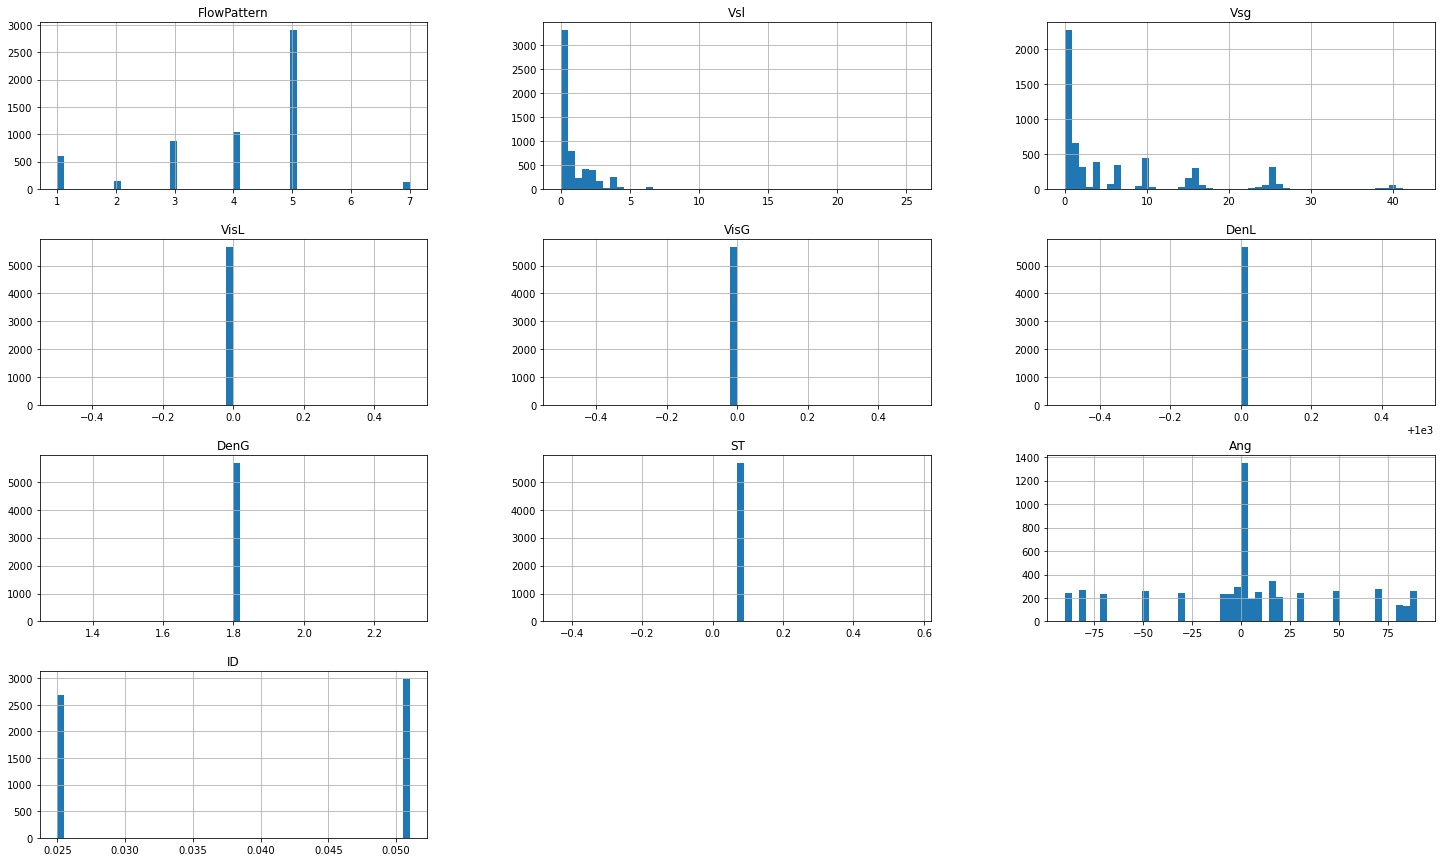



Box plots:


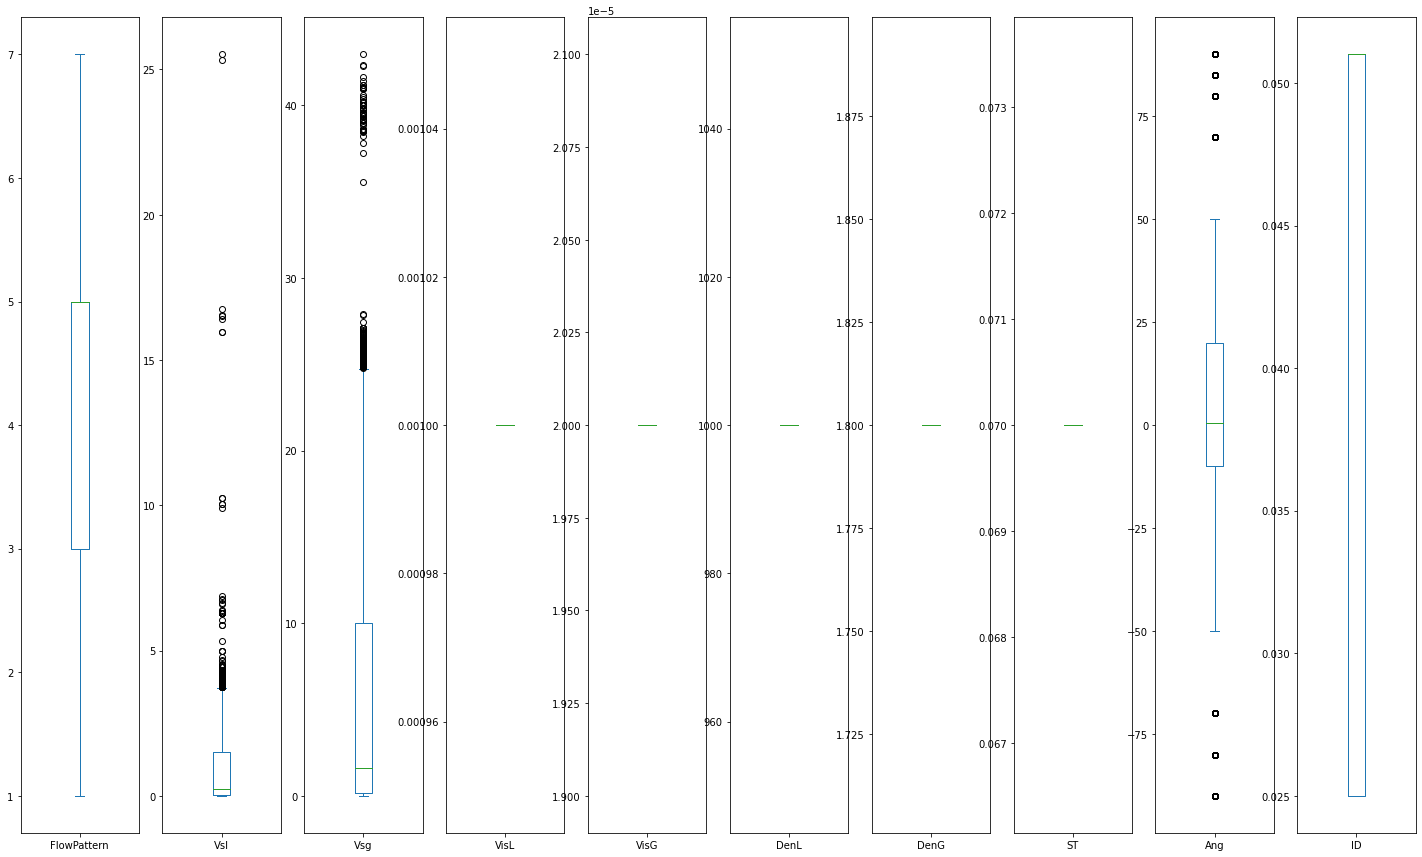



Correlation matrix:


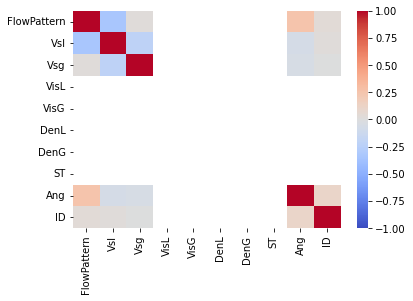



Scatter plots:


/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 0.001 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 2e-05 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 1000.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 1.8 results in singular trans

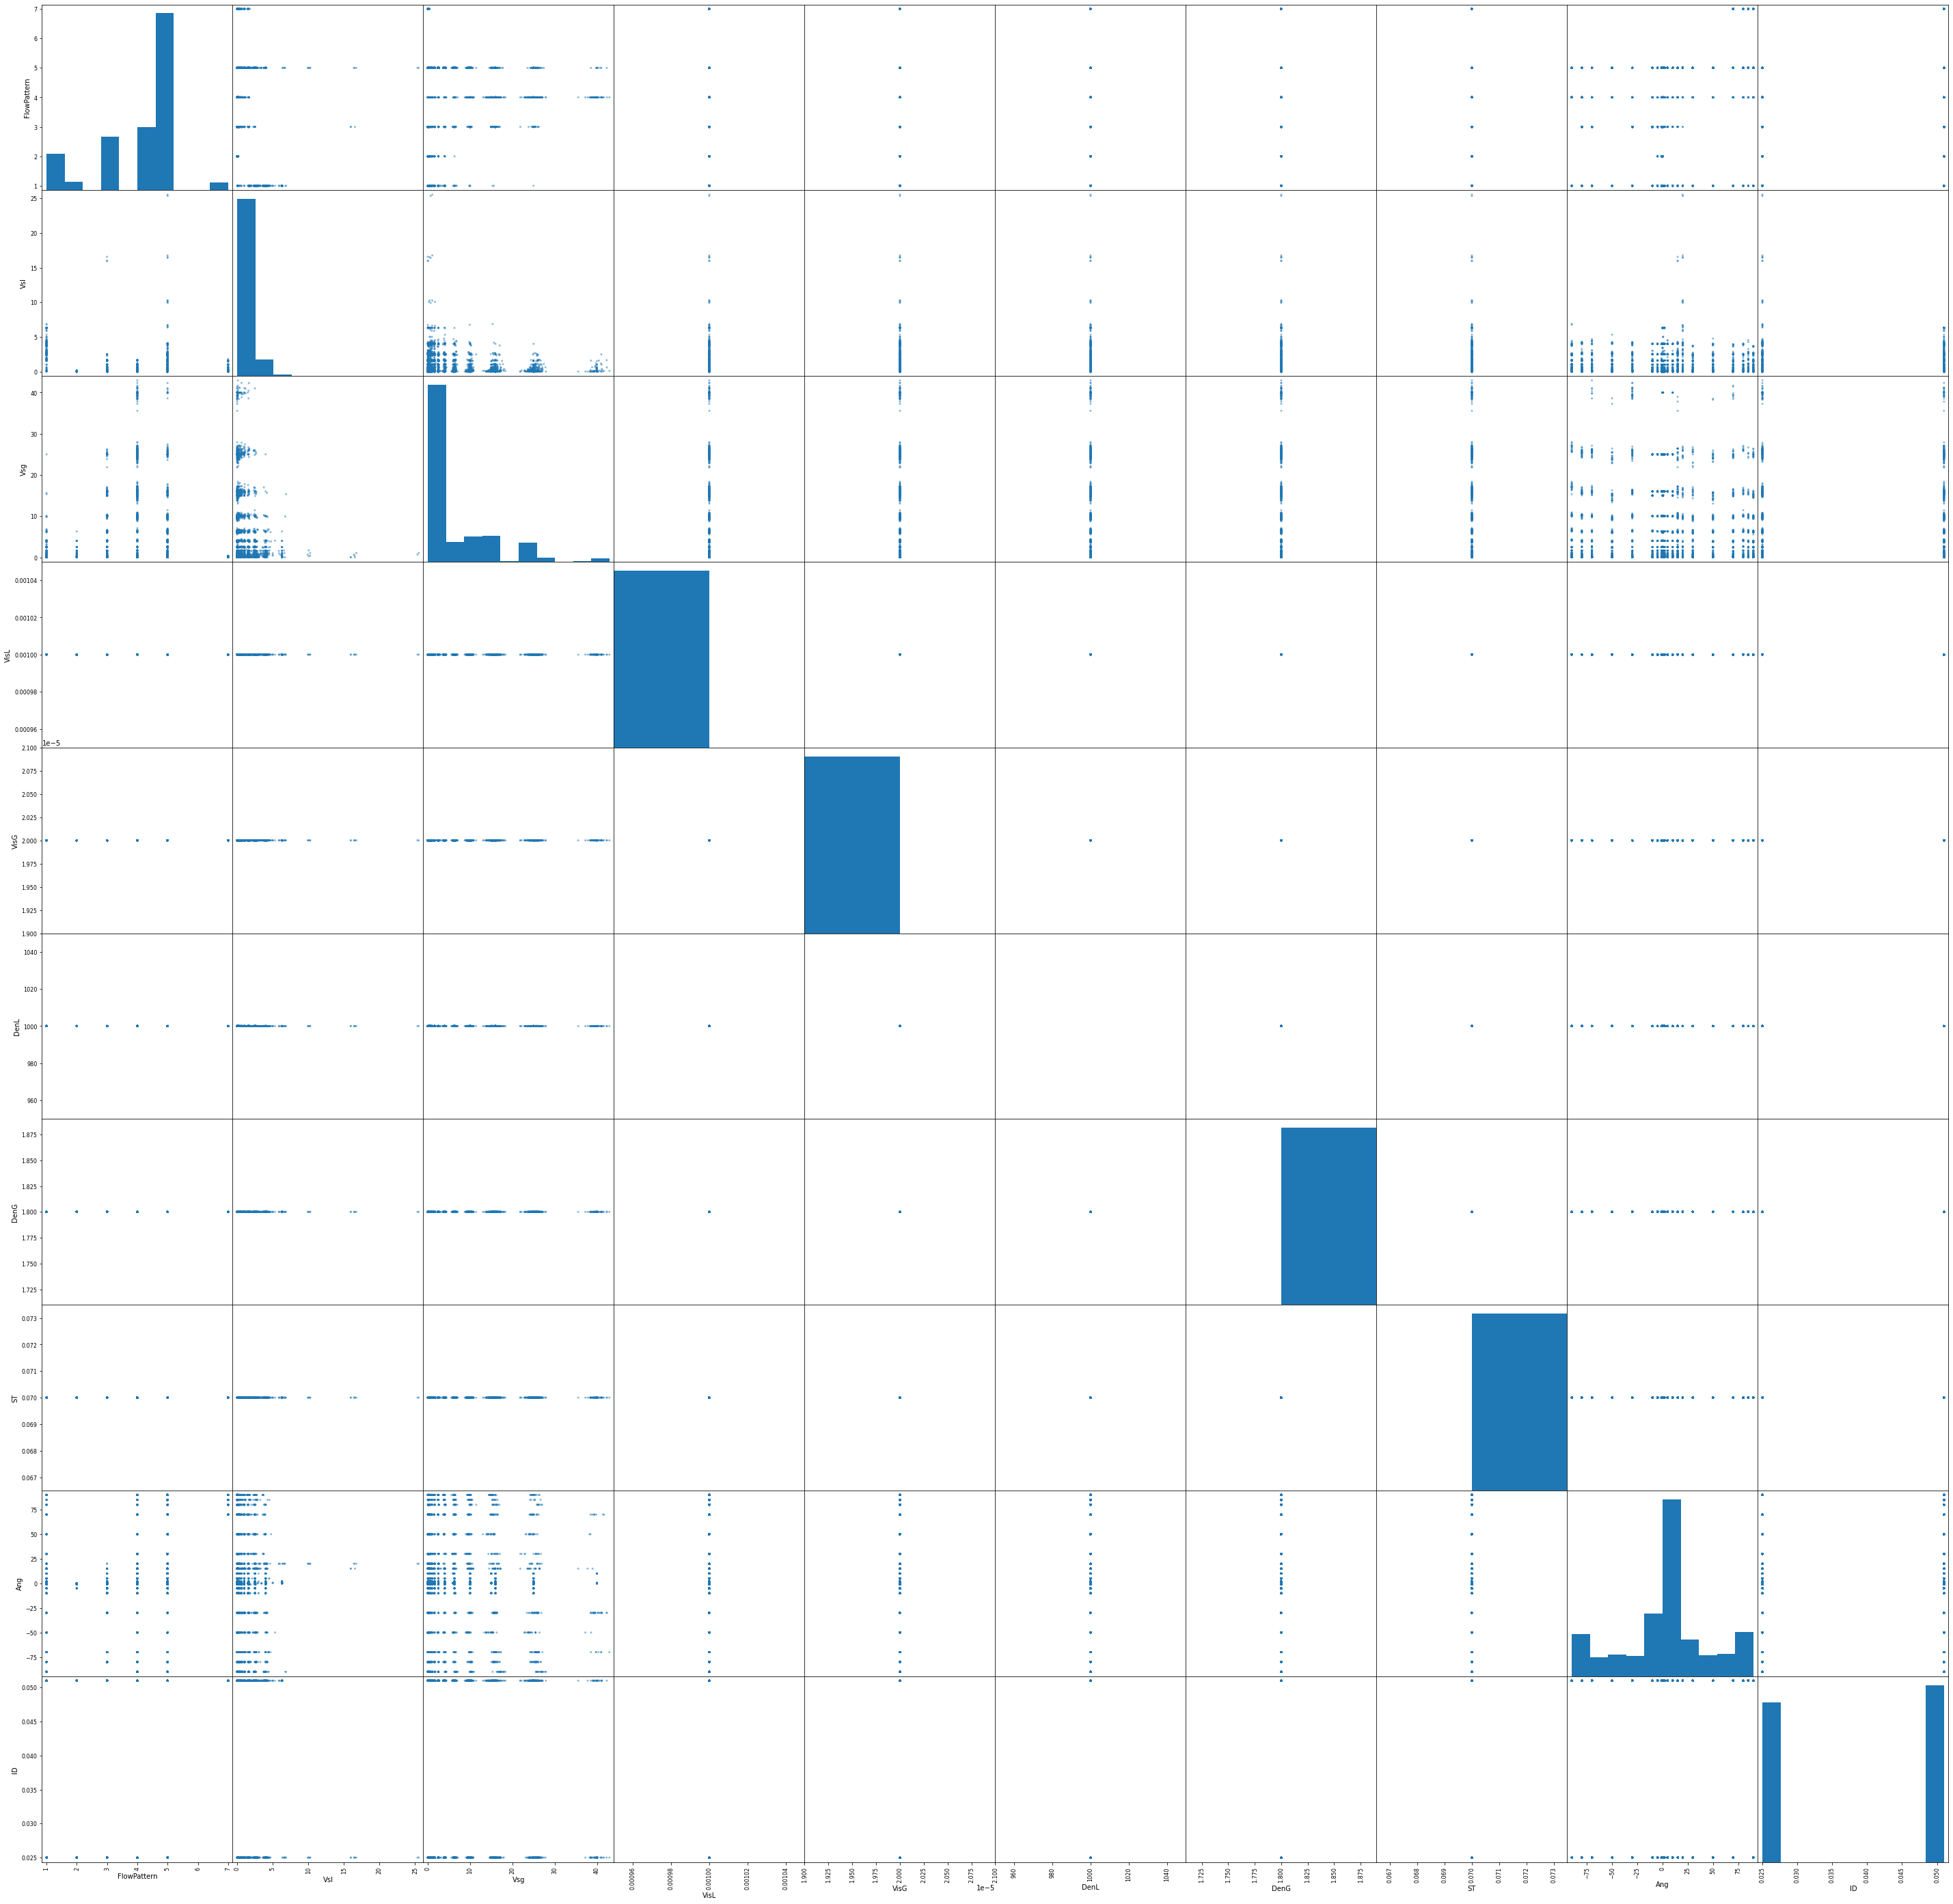

In [39]:
print('Histograms:')
dataset.hist(figsize=(25, 15), bins=50)  # bins ~= sqrt(N)
pl.show()

print("\n")

print('Box plots:')
dataset.plot(figsize=(25, 15), kind='box', subplots=True, sharex=False, sharey=False)
pl.show()

print("\n")

print('Correlation matrix:')
corr = dataset.corr()
sns.heatmap( corr, cmap='coolwarm', vmax=1.0, vmin=-1.0 );
pl.show()

print("\n")

print('Scatter plots:')
scatter_matrix(dataset, figsize=(50, 50))
pl.show()

print("\n")

#  <font color='red'>Part 2</font>

* **predicting the FlowPattern value based on the values of the variables named Vsl, Vsg, and Ang**

In [40]:
print('Reading list of problem variables X and Y...')
X_name = [ 'Vsl', 'Vsg', 'Ang' ] # columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features

y_name = 'FlowPattern'     # column to focus on as target
y = dataset[y_name]   # only keep this column as label 

print('done \n')

Reading list of problem variables X and Y...
done 



* **Sample rows from X (top and bottom) and Statistical summary of X**

In [41]:
# Spot checks for X:

print('Sample rows from X (top and bottom):')
display(X.head(3))
display(X.tail(3))
print('\n')

print('Statistical summary of X:')
display(X.describe())
print('\n')

Sample rows from X (top and bottom):


,Vsl,Vsg,Ang
0,6.3,0.025,0.0
1,4.0,0.040,0.0
2,6.3,0.040,0.0


,Vsl,Vsg,Ang
5672,1.05338,16.0692,-80.0
5673,1.05397,25.7439,-80.0
5674,1.66789,26.1616,-80.0




Statistical summary of X:


,Vsl,Vsg,Ang
count,5675.000000,5675.000000,5675.000000
mean,0.899747,6.222612,2.727401
std,1.425159,8.699644,46.202822
min,0.001100,0.003720,-90.000000
25%,0.016000,0.162055,-10.000000
50%,0.250000,1.600000,0.500000
75%,1.500000,10.000000,20.000000
max,25.517000,42.956200,90.000000


* **Graphical Summaries**:
  *Histograms, Box plots, Correlation matrix and Scatter plots*

Summary of X - Univariate graphs

Histograms:


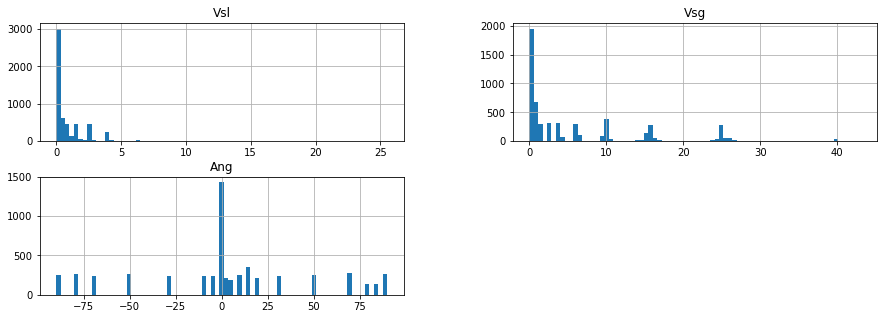



Box plots:


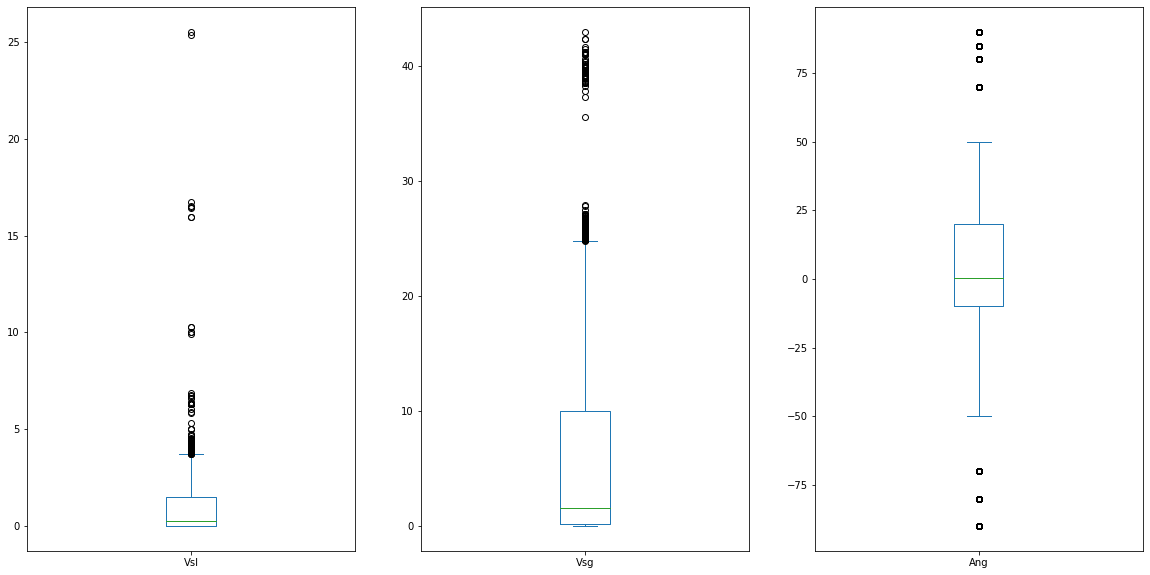



Correlation matrix:



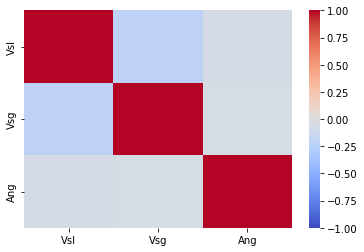



Scatter plots:



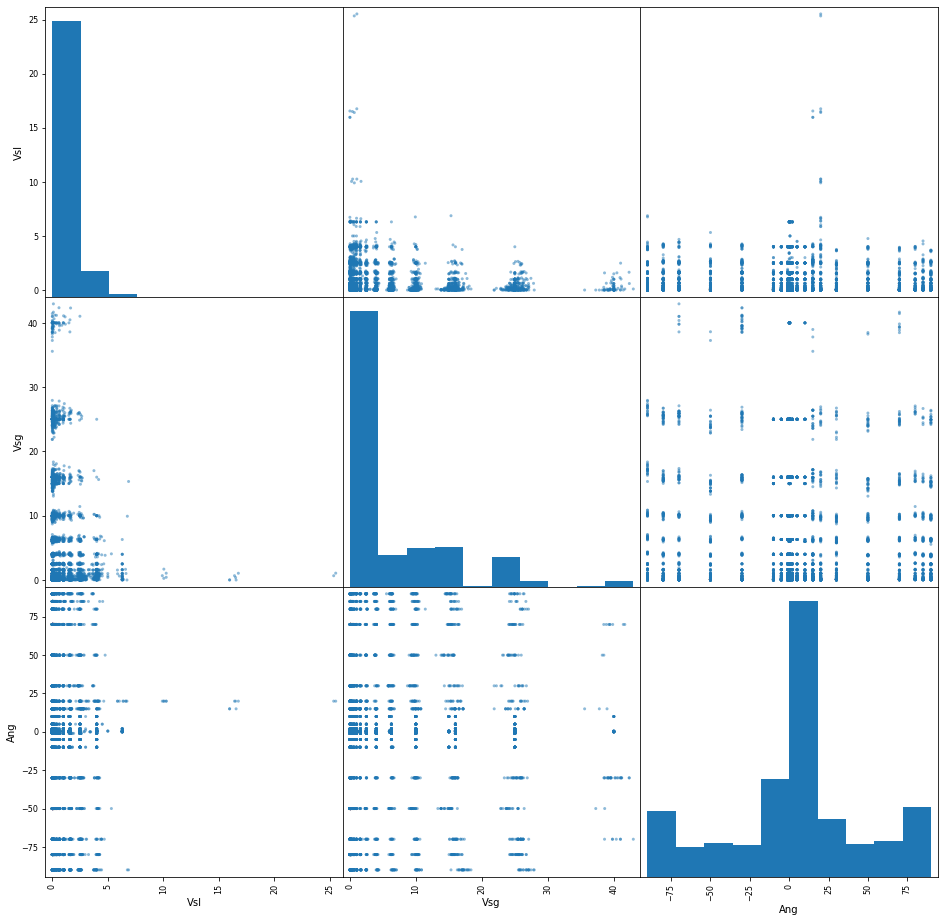

In [42]:
print('Summary of X - Univariate graphs')
print()

print('Histograms:')
X.hist(figsize=(15, 5), bins=75)  # bins ~= sqrt(N)
pl.show()

print("\n")

print('Box plots:')
X.plot(figsize=(20,10), kind='box', subplots=True, sharex=False, sharey=False)
pl.show()

print("\n")

print('Correlation matrix:\n')
corr = X.corr()
sns.heatmap( corr, cmap='coolwarm', vmax=1.0, vmin=-1.0 );
pl.show()

print("\n")

print('Scatter plots:\n')
scatter_matrix(X, figsize=(16, 16))
pl.show()

print("\n")

* **Spot checks for y:**

In [43]:
print('Summary of y:')
display(y.value_counts())

Summary of y:


5    2905
4    1033
3     878
1     594
2     140
7     125
Name: FlowPattern, dtype: int64


# <font color='red'>Part 3</font>

# Evaluate two Classification Algorithms: KNN and logistic regression 

* **Split data into training and testing datasets**

In [44]:
test_pct = 0.20   # reserve 20% of the data points for testing performance
seed = 7          # specifying the seed allows for repeatability
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)
print('done with setting aside data for testing')

done with setting aside data for testing


* **Traning Algorithms**

/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RESULTS FOR Logistic-Regression
Accuracy: 0.6519823788546255


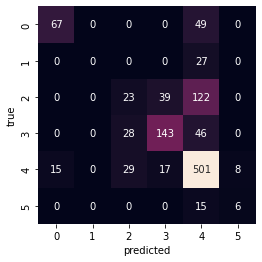

/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta


 clasification report:
               precision    recall  f1-score   support

           1       0.82      0.58      0.68       116
           2       0.00      0.00      0.00        27
           3       0.29      0.12      0.17       184
           4       0.72      0.66      0.69       217
           5       0.66      0.88      0.75       570
           7       0.43      0.29      0.34        21

    accuracy                           0.65      1135
   macro avg       0.49      0.42      0.44      1135
weighted avg       0.61      0.65      0.61      1135

Cohen Kappa Score: 0.43056536384374255


RESULTS FOR KNN-distance
Accuracy: 0.8405286343612335


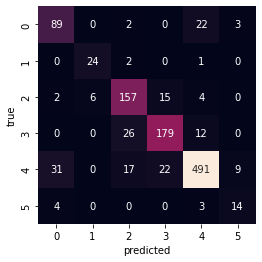


 clasification report:
               precision    recall  f1-score   support

           1       0.71      0.77      0.74       116
           2       0.80      0.89      0.84        27
           3       0.77      0.85      0.81       184
           4       0.83      0.82      0.83       217
           5       0.92      0.86      0.89       570
           7       0.54      0.67      0.60        21

    accuracy                           0.84      1135
   macro avg       0.76      0.81      0.78      1135
weighted avg       0.85      0.84      0.84      1135

Cohen Kappa Score: 0.7676166667609314




In [45]:
# Algorithms
models = []
models.append(('Logistic-Regression', LogisticRegression(random_state=seed))) # default=’lbfgs’
models.append(('KNN-distance', KNeighborsClassifier(n_neighbors=5, weights='uniform'))) # default is n_neighbors=5, weights='uniform'

# evaluate each model in turn
results = []
names = []
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    print('RESULTS FOR '+name)  
    print('Accuracy:', accuracy_score(y_test, y_predicted))
    sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, fmt='d', cbar=False)
    pl.xlabel('predicted')
    pl.ylabel('true');
    pl.show()
    print('\n clasification report:\n', classification_report(y_test, y_predicted))
    print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_predicted))
    print('\n')  

# <font color='red'>Part 4</font>

Modifying hyperparameters 

* **multi_class=multinomial and max_iter=250 in LR Model** 
* **n_neighbors=3, weights=distance in KNN-uniform Model**


/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RESULTS FOR LR
Accuracy: 0.6555066079295154


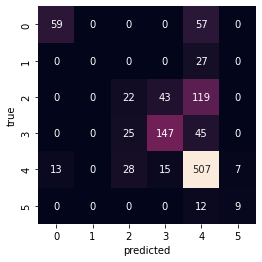

/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/dsi/apps/anaconda3/python-3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta


 clasification report:
               precision    recall  f1-score   support

           1       0.82      0.51      0.63       116
           2       0.00      0.00      0.00        27
           3       0.29      0.12      0.17       184
           4       0.72      0.68      0.70       217
           5       0.66      0.89      0.76       570
           7       0.56      0.43      0.49        21

    accuracy                           0.66      1135
   macro avg       0.51      0.44      0.46      1135
weighted avg       0.61      0.66      0.61      1135

Cohen Kappa Score: 0.4339924648816038


RESULTS FOR KNN, n_neighbors=3, weights=distance
Accuracy: 0.8572687224669604


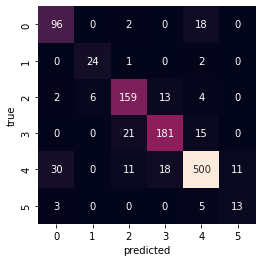


 clasification report:
               precision    recall  f1-score   support

           1       0.73      0.83      0.78       116
           2       0.80      0.89      0.84        27
           3       0.82      0.86      0.84       184
           4       0.85      0.83      0.84       217
           5       0.92      0.88      0.90       570
           7       0.54      0.62      0.58        21

    accuracy                           0.86      1135
   macro avg       0.78      0.82      0.80      1135
weighted avg       0.86      0.86      0.86      1135

Cohen Kappa Score: 0.7910413837385716




In [46]:
models = []
models.append(('LR', LogisticRegression(multi_class='multinomial', class_weight=None, solver='lbfgs', max_iter=250)))

models.append(('KNN, n_neighbors=3, weights=distance', KNeighborsClassifier(n_neighbors=3, weights='distance'))) # default is n_neighbors=5, weights='uniform'

# evaluate each model in turn
results = []
names = []
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    print('RESULTS FOR '+name)  
    print('Accuracy:', accuracy_score(y_test, y_predicted))
    sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, fmt='d', cbar=False)
    pl.xlabel('predicted')
    pl.ylabel('true');
    pl.show()
    print('\n clasification report:\n', classification_report(y_test, y_predicted))
    print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_predicted))
    print('\n')  

*Result: We can see a small improvemnet in both model LR and KNN performance compare to their default's settings the by modifying some hyperparameters.*

# <font color='red'>Part 5</font>

**Test the performance of the best model**




We have 2 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

As we can see that it looks like KNN has the largest estimated accuracy score.So, KNN is the best model.



 ++++ Detailed classification report for the selected model ++++ 
Algorithm KNeighborsClassifier(n_neighbors=3, weights='distance') 
This model was trained and tuned on the development set using CV.
The following results are computed on the separate test set:


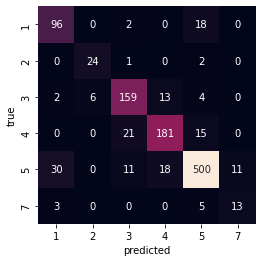


 clasification report:
               precision    recall  f1-score   support

           1       0.73      0.83      0.78       116
           2       0.80      0.89      0.84        27
           3       0.82      0.86      0.84       184
           4       0.85      0.83      0.84       217
           5       0.92      0.88      0.90       570
           7       0.54      0.62      0.58        21

    accuracy                           0.86      1135
   macro avg       0.78      0.82      0.80      1135
weighted avg       0.86      0.86      0.86      1135

Cohen Kappa Score: 0.7910413837385716


done 



In [47]:

selected_model = KNeighborsClassifier(n_neighbors=3, weights='distance') # default is n_neighbors=5, weights='uniform'
selected_model.fit(X_train, y_train)
predictions = selected_model.predict(X_test)
print(" ++++ Detailed classification report for the selected model ++++ " )
print("Algorithm %s " % selected_model)
print("This model was trained and tuned on the development set using CV.")
print("The following results are computed on the separate test set:")
#
predictions = selected_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
df_cm = pandas.DataFrame(cm, columns=numpy.unique(y_test), index = numpy.unique(y_test))
sns.heatmap(df_cm, square=True, annot=True, fmt='d', cbar=False )
pl.xlabel('predicted')
pl.ylabel('true')
pl.show()
#
print('\n clasification report:\n', classification_report(y_test, predictions))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, predictions))
print('\n')        
print('done \n')

# Result

We ran the KNN model on the separate test set and summarized the results as a final accuracy score, a confusion matrix and a classification report which show KNN is a better model.